In [2]:
import pandas as pd
df=pd.read_csv('C:/Users/abhi0/Downloads/datasets_800154_1372289_estonia-passenger-list.csv')

In [3]:
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [7]:
df['Survived'].value_counts()

0    852
1    137
Name: Survived, dtype: int64

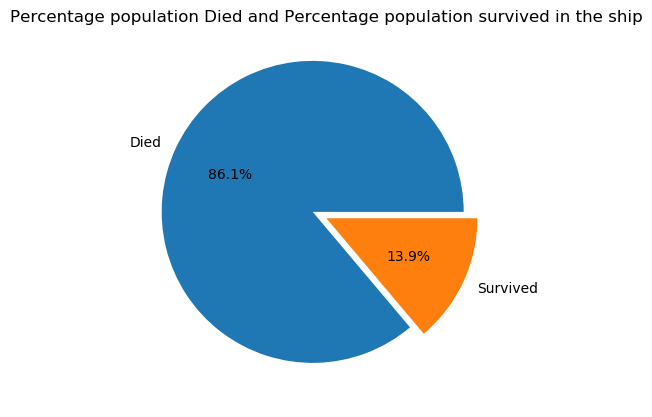

In [48]:
tempValues=df['Survived'].value_counts().values
labels=['Died','Survived']

import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
explode=(0.1,0)
ax.pie(tempValues,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title('Percentage population Died and Percentage population survived in the ship')
plt.show()

In [11]:
#Population of different countries in the ship

df['Country'].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Netherlands        2
Great Britain      2
Morocco            2
Canada             1
France             1
Nigeria            1
Belarus            1
Name: Country, dtype: int64

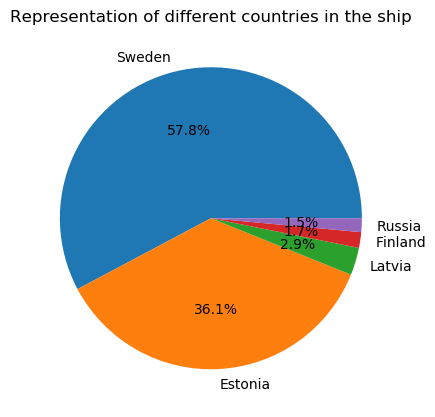

In [47]:
#Percentage population of top 5 populous country in the ship:

tempValues=df['Country'].value_counts().values[:5]
tempKeys=df['Country'].value_counts().keys()[:5]

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(tempValues,labels=tempKeys,autopct='%1.1f%%')
plt.title('Representation of different countries in the ship')
plt.show()




In [17]:
#Mean age of survived and deceased population: 

df['Age'].groupby(df['Survived']).mean()

Survived
0    46.273474
1    34.014599
Name: Age, dtype: float64

**Mean age of the deceased population is around 46 years while the mean age of the population survived is around 34 years**

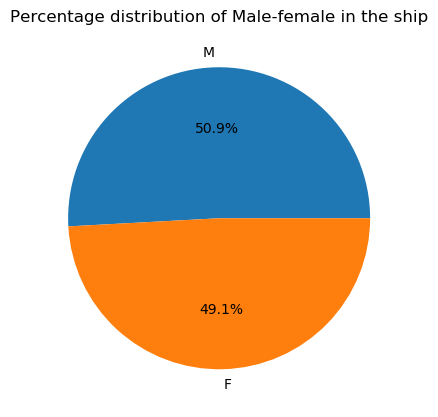

In [46]:
#Percentage of male-female population in the ship:

tempKeys=df['Sex'].value_counts().keys()
tempValues=df['Sex'].value_counts().values

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(tempValues,labels=tempKeys,autopct='%1.1f%%')
plt.title('Percentage distribution of Male-female in the ship')
plt.show()

**Almost equal male-female sex ratio in the ship**

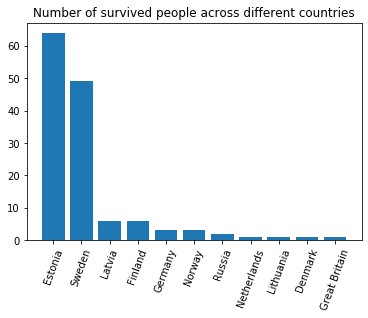

In [45]:
#Number of people survived for the different countries

df[df['Survived']==1]['Country'].value_counts()

tempkeys=df[df['Survived']==1]['Country'].value_counts().keys()
tempValues=df[df['Survived']==1]['Country'].value_counts().values
plt.bar(tempkeys,tempValues)
plt.tick_params(axis='x',rotation=70)
plt.title('Number of survived people across different countries')
plt.show()

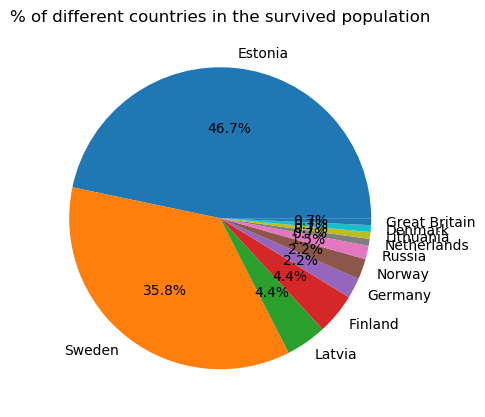

In [44]:
#percentage wise distribution of survived population across different countries:

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(tempValues,labels=tempkeys,autopct='%1.1f%%')
plt.title('% of different countries in the survived population')
plt.show()

**Sweeden,Estonia seem to have the highest number of survived percentage followed by Latvia,Finalnd and Germany**

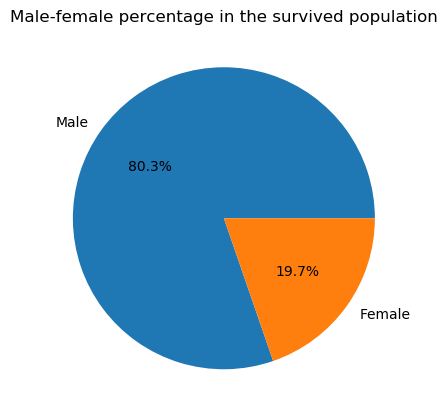

In [41]:
#Male-female ratio in the survived population:

tempKeys=['Male','Female']
tempValues=df[df['Survived']==1]['Sex'].value_counts().values

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(tempValues,labels=tempKeys,autopct='%1.1f%%')
plt.title('Male-female percentage in the survived population')
plt.show()

**80% of the survived population seem to be Male**

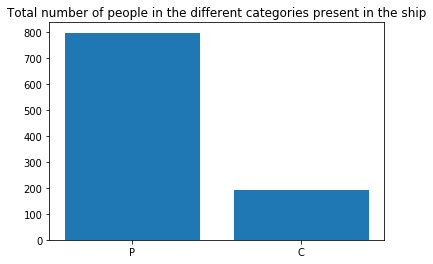

In [54]:
# Different 'Category' in the ship:

tempKeys=df['Category'].value_counts().keys()
tempValues=df['Category'].value_counts().values

plt.bar(tempKeys,tempValues)
plt.title('Total number of people in the different categories present in the ship')
plt.show()

**Around 800 seem to be from category 'P' while around 200 seem to be from category 'C'.**

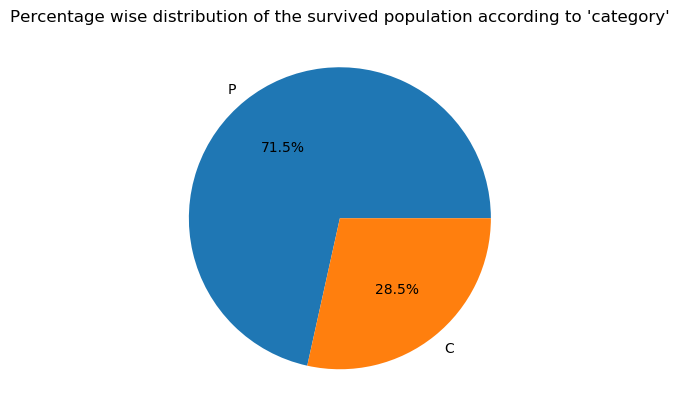

In [53]:
#Percentage wise distribution of survived population in the different 'category':

tempKeys=df[df['Survived']==1]['Category'].value_counts().keys()
tempValues=df[df['Survived']==1]['Category'].value_counts().values

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
ax.pie(tempValues, labels=tempKeys,autopct='%1.1f%%')
plt.title('Percentage wise distribution of the survived population according to \'category\'')
plt.show()

**Around 71% of the survived population seemed to be from the 'P' category while around 29% seemed to be from the 'C' category.**

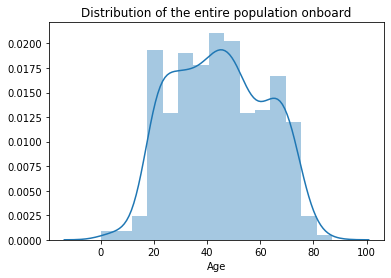

In [57]:
import seaborn as sns
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.title('Distribution of the entire population onboard')
plt.show()

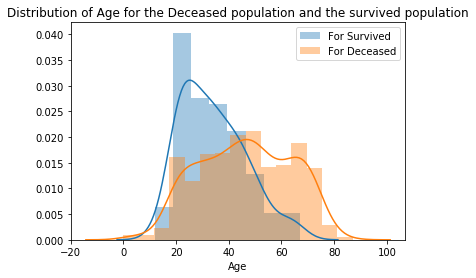

In [61]:
tempValues=df[df['Survived']==1]['Age']
tempValues2=df[df['Survived']==0]['Age']
ax=sns.distplot(tempValues,label='For Survived')
ax=sns.distplot(tempValues2,label='For Deceased')
ax.legend()
plt.title('Distribution of Age for the Deceased population and the survived population')
plt.show()

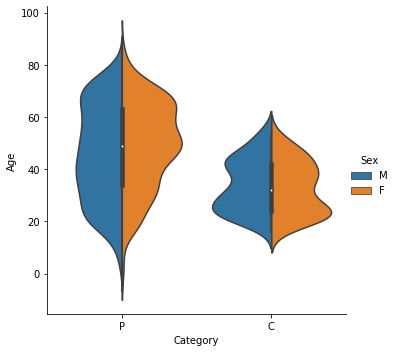

In [71]:
#Categorical plot for the 'category' criteria

sns.catplot(x='Category',y='Age',data=df,kind='violin',hue='Sex',split=True)
plt.show()

**This shows that the category 'P' has people of ages from very low age such as children to elderly people while category 'C' is limited to people in the age group 20-50.The Male to female ratio in both the categories are same.**

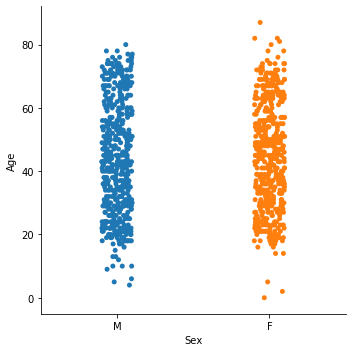

In [64]:
#Categorical plot for the 'Gender' criteria

sns.catplot(x='Sex',y='Age',data=df)
plt.show()

**The categorical distribution of the Male and female age is about the same.Around the same mean with similar variance**

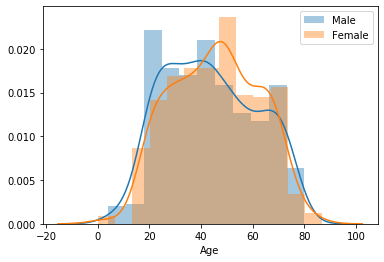

In [65]:
#Age distribution of 'Male' and 'Female' population in the ship

tempValuesMale=df[df['Sex']=='M']['Age']
tempValuesFemale=df[df['Sex']=='F']['Age']

ax=sns.distplot(tempValuesMale,label='Male')
ax=sns.distplot(tempValuesFemale,label='Female')
ax.legend()
plt.show()


**From the above plot it seems that the mode of the age-distribution for Males lie in the range 20-25 and for the females lie above 45. This might be one of the reasons that more Males survived than females. As shown previously the survived population had around 80% males**

In [66]:
tempMale=[]
tempFemale=[]
for i in range(len(df['Age'])):
    if df['Survived'][i]==1 and df['Sex'][i]=='M':
        tempMale.append(df['Age'][i])
    if df['Survived'][i]==1 and df['Sex'][i]=='F':
        tempFemale.append(df['Age'][i])
        

import numpy as np        
#Mean age of the survived Male population:
temp=np.mean(tempMale)
print(f'Mean age of the survived male population is {temp}')

#Mean age of the survived Female population:
temp=np.mean(tempFemale)
print(f'Mean age of the survived female population is {temp}')

Mean age of the survived male population is 34.56363636363636
Mean age of the survived female population is 31.77777777777778


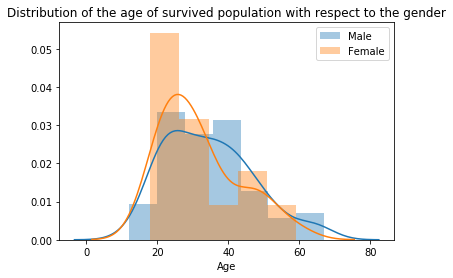

In [67]:
#Distribution of the age of survived population with respect to the gender

ax=sns.distplot(tempMale,label='Male')
ax=sns.distplot(tempFemale,label='Female')
ax.legend()
plt.title('Distribution of the age of survived population with respect to the gender')
plt.xlabel('Age')
plt.show()

**The survived population for both the genders seem to be around the same mean. The variance of the survived male population seems to be higher. The survived female population seem to be large in number in the age group of 20-25 while the male population seem to have higher numbers in the age group of 35-40 years along with the age group of 20-25 years.** 

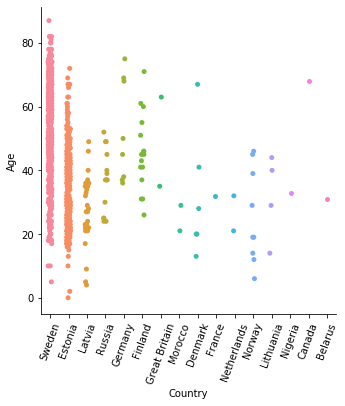

In [68]:
#Categorical plot for the age of passengers 
#boarding from different countries

sns.catplot(x='Country',y='Age',data=df)
plt.tick_params(axis='x',rotation=70)
plt.show()

**Germany seem to have people in the age group of 40 and above while Norway seemed to be on the other side with most of the population being less than 40**

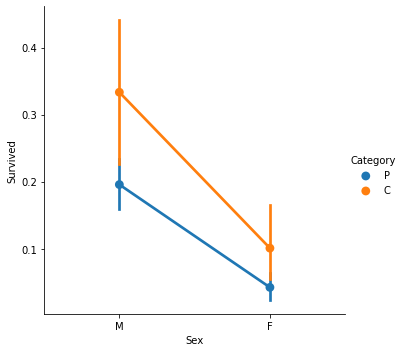

In [75]:
sns.catplot(x='Sex',y='Survived',data=df,kind='point',hue='Category')
plt.show()

**The Females in both the categories had a very low probability of survival compared to the Males. The Males in 'C' category had the highest probability of survival.**